In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [12]:
# genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [13]:
data = pd.DataFrame(columns = [*wt,*ko], index = genes)


In [14]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [15]:
print(data.head())
print (data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  130  161  146  162  152  591  623  639  576  624
gene2  927  985  878  927  898  248  206  238  197  246
gene3  213  222  212  232  228  795  849  809  785  802
gene4  144  165  152  189  143  811  816  809  870  877
gene5   80   78   87   82   77  168  183  184  185  172
(100, 10)


In [16]:
scaled_data = preprocessing.scale(data.T)

In [17]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data) #This is where er generate coordinates for PCA graph based on the loading scores and scaled data.

# Plotting Graph - Scree Plot

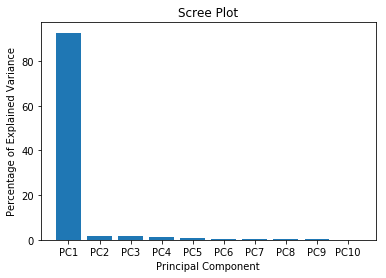

In [21]:
per_val = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_val)+1)]

plt.bar(x=range(1,len(per_val)+1), height=per_val, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# Constructing PCA Plot

92.7


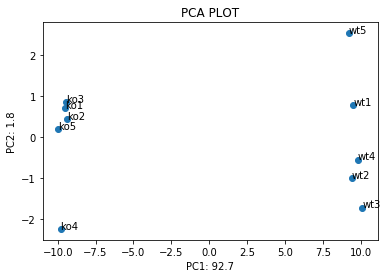

In [27]:
pca_df = pd.DataFrame(pca_data, index = [*wt,*ko], columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA PLOT')
print(per_val[0])
plt.xlabel('PC1: '+ str(per_val[0]))
plt.ylabel('PC2: '+ str(per_val[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

Loading scores for PC1 to determine which genes has the largest influence on separating the twp clusters along the x-axis

In [29]:
loading_scores = pd.Series(pca.components_[0], index=genes) # PCs are zero-indexed.
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False) #Sort the loading scores based on their magnitude
top_10_genes = sorted_loading_scores[0:10].index.values #Getting names of top 10 indices

print(loading_scores[top_10_genes])

gene82    0.103808
gene77    0.103794
gene42   -0.103793
gene99    0.103752
gene18    0.103749
gene27   -0.103718
gene33   -0.103714
gene58    0.103709
gene88    0.103706
gene91   -0.103702
dtype: float64


As these values are similar, hence a lot of genes played a role in separating the samples rather than just one or two